# Problem statement

- $\theta(x) = \frac{T(x) - T_\inf}{T_{b} - T_{\inf}}$

$$ \frac{\partial }{\partial x*} \left(  ( 1 + \epsilon_c \theta )  \frac{\partial \theta }{\partial x*} \right)   - N^2 \theta + N^2 G ( 1 + \epsilon_G \theta ) = 0   $$ 

- $N = \sqrt{\frac{h P L^2}{ k_0 A }} $




In [1]:
T_inf = 27 + 273 #in K
T_b = 127 + 273 #in K

In [2]:
NUM_DATA_TRAINING = 100 

In [3]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## Load dataset

In [4]:
relative_csv_path = "./../src/data/raw/Dataset.csv"
split_ratio = 0.2

# Load different temperatures samples 
fields = ['T1', 'T2', 'T3', 'T4' ,'T5', 'T6' ,'T7', 'T8' ,'T9']
df_T = pd.read_csv(relative_csv_path, skipinitialspace=True, usecols=fields)
X_train, X_test = train_test_split(df_T, test_size = split_ratio)

# Load different G values 
fields = ['G']
df_G = pd.read_csv(relative_csv_path, skipinitialspace=True, usecols=fields)
Y_train, Y_test = train_test_split(df_G, test_size = split_ratio)

### Print shape and sizes

In [5]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()
Y_train = Y_train.to_numpy()
Y = df_T.to_numpy()

# Compute columns shampes
num_col_X = X_train.shape[1]
num_col_Y = Y_train.shape[1]

print("X_test information:")
print("the size of X_test is", X_test.size)
print("the shape of X_test is", X_test.shape)

print("X_train information:")
print("the size of X_train is", X_train.size)
print("the shape of X_train is", X_train.shape)

print("Y_train information:")
print("the size of Y_train is", Y_train.size)
print("the shape of Y_train is", Y_train.shape)

print("Y_test information:")
print("the size of Y_test is", Y_test.size)
print("the shape of Y_test is", Y_test.shape)

X_test information:
the size of X_test is 900
the shape of X_test is (100, 9)
X_train information:
the size of X_train is 3600
the shape of X_train is (400, 9)
Y_train information:
the size of Y_train is 400
the shape of Y_train is (400, 1)
Y_test information:
the size of Y_test is 100
the shape of Y_test is (100, 1)


### Compute $\theta$ as `X_train`

In [6]:
X_train = np.multiply(np.add(X_train, [-T_inf]), [1/(T_b - T_inf)])
X_test = np.multiply(np.add(X_test, [-T_inf]), [1/(T_b - T_inf)])

## Reduce

In [7]:
X_train_reduced = X_train[:NUM_DATA_TRAINING]
print("the shape of X_train_reduced is", X_train_reduced.shape)

Y_train_reduced = Y_train[:NUM_DATA_TRAINING]
print("the shape of Y_train_reduced is", Y_train_reduced.shape)

the shape of X_train_reduced is (100, 9)
the shape of Y_train_reduced is (100, 1)


### Normalize

In [27]:
def normalize(xi, xmax, xmin):
#   if (xmax - xmin) == 0:
#     return 0 
#   else:
    return 2 * (xi - xmin) / (xmax - xmin) - 1

min_x = [np.min(X_train_reduced[:,col_T]) for col_T in range(num_col_X)]
max_x = [np.max(X_train_reduced[:,col_T]) for col_T in range(num_col_X)]
min_y = [np.min(Y_train_reduced[:,col_T]) for col_T in range(num_col_Y)]
max_y = [np.max(Y_train_reduced[:,col_T]) for col_T in range(num_col_Y)]

normalized_X_reduced_train = np.copy(X_train_reduced)
normalized_Y_reduced_train = np.copy(Y_train_reduced)

for col in range(num_col_X): 
  for row in range(NUM_DATA_TRAINING):
    normalized_X_reduced_train[row,col] = normalize(X_train_reduced[row,col], max_x[col] , min_x[col])
    if col == 0:
        normalized_Y_reduced_train[row,col] = normalize(Y_train_reduced[row,col], max_y[col] , min_y[col])
        
min_x
max_x

/tmp/ipykernel_98083/652232229.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return 2 * (xi - xmin) / (xmax - xmin) - 1


[1.0,
 1.046786371,
 1.0864455140000002,
 1.1193942579999998,
 1.1459502959999999,
 1.166361219,
 1.180812409,
 1.189432623,
 1.1922976829999998]

   ### Plot $\theta(x)$ for different G values

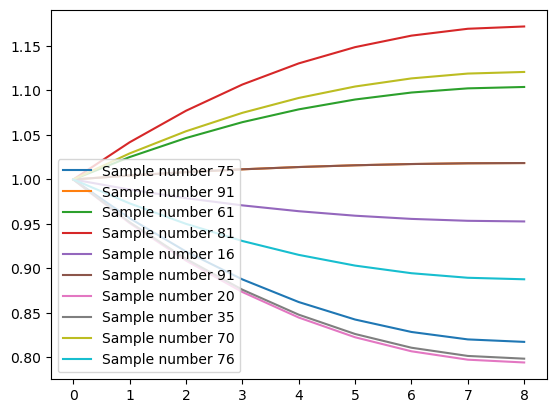

In [18]:
num_data_training = 100
num_plots = 10
for i in range(num_plots):
  picked = np.random.randint(0, num_data_training-1) 
  label =  'Sample number {}'.format(picked)
  plt.plot(X_train[picked,:],label=label)

plt.legend(loc = 'lower left')
# plt.title("Vanishing gradient")
plt.show()

### Plot nromalized $\theta(x)_n$ for different G values

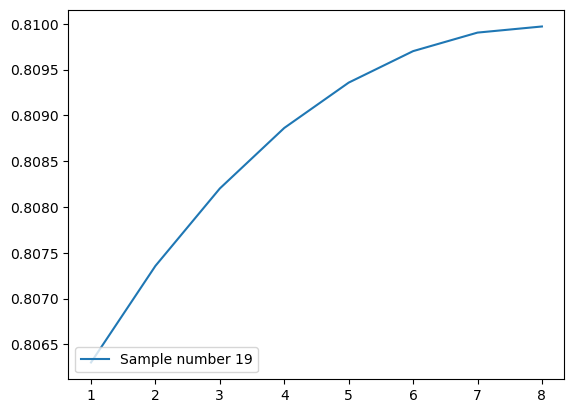

In [30]:
num_data_training = 100
num_plots = 1
for i in range(num_plots):
  picked = np.random.randint(0, num_data_training-1) 
  label =  'Sample number {}'.format(picked)
  plt.plot(normalized_X_reduced_train[picked,:],label=label)

plt.legend(loc = 'lower left')
# plt.title("Vanishing gradient")
plt.show()

